# Oscillatory 0-D reactor demo
Mike Hansen, March 2019

The purpose of this demo is to show the 0-D reactor class that largely hides details of the time integrator.

In [1]:
from spitfire.chemistry.mechanism import ChemicalMechanismSpec
from spitfire.chemistry.reactors import HomogeneousReactor

In [2]:
mechanism = ChemicalMechanismSpec(cantera_xml='mechanisms/h2-burke.xml', group_name='h2-burke')

air = mechanism.stream(stp_air=True)
fuel = mechanism.stream('X', 'H2:1')

mix = mechanism.mix_for_equivalence_ratio(1.0, fuel, air)
mix.TP = 800., 101325.

feed = mechanism.copy_stream(mix)

<IPython.core.display.Javascript object>


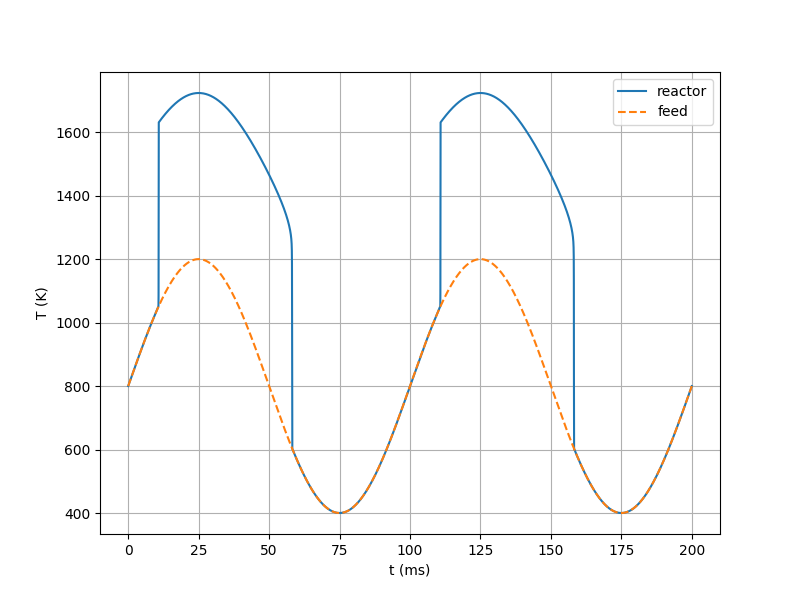

In [3]:
from numpy import sin as sin, pi as pi

feed_temperature_fxn = lambda t: 800. + 400. * sin(2. * pi * 10. * t)

reactor = HomogeneousReactor(mechanism, mix,
                             configuration='isobaric',
                             heat_transfer='adiabatic',
                             mass_transfer='open',
                             mixing_tau=1.e-5,
                             feed_temperature=feed_temperature_fxn,
                             feed_mass_fractions=feed.Y)

reactor.insitu_process_quantity('temperature')
reactor.integrate_to_time(0.2, transient_tolerance=1.e-10, write_log=False)

import matplotlib.pyplot as plt
%matplotlib notebook

t = reactor.solution_times
plt.plot(t * 1.e3, reactor.trajectory_data('temperature'), '-', label='reactor')
plt.plot(t * 1.e3, feed_temperature_fxn(t), '--', label='feed')

plt.ylabel('T (K)')
plt.xlabel('t (ms)')
plt.legend()
plt.grid()
plt.gcf().set_size_inches(8, 6)
plt.show()